## Import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* we will learn california_housing data
* from sklearn package

## Read the data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

sklearn has provided data and target seperately  
we need to make dataframe

* Number of Instances: 20640
* Number of Attributes: 8 numeric, predictive attributes and the target
* The target variable is the median house value for California districts
* Objective: median house value

In [6]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
housing_df["MEDV"] = housing.target

In [10]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

## Analyse the target variable

C:\Users\mdsho\AppData\Local\Temp\ipykernel_16356\1197168365.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_df["MEDV"], bins=50);


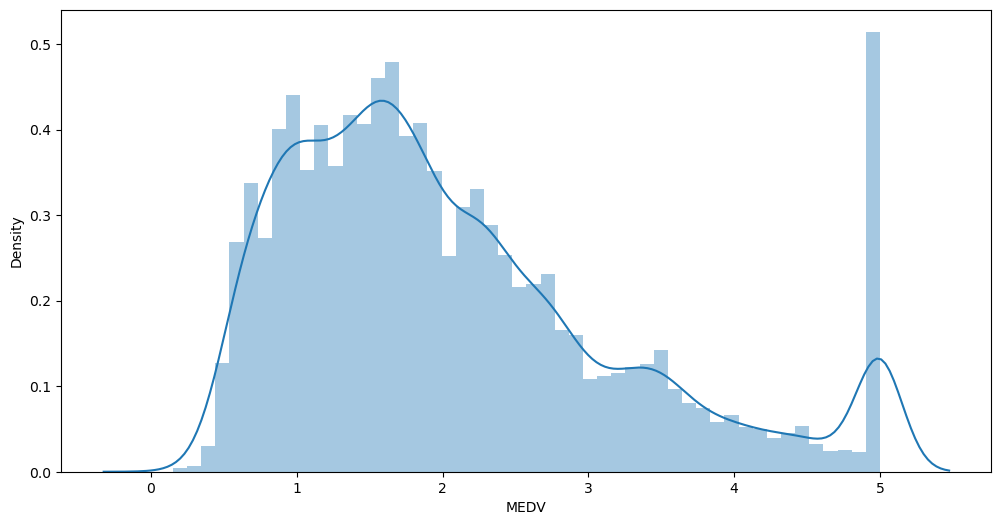

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(housing_df["MEDV"], bins=50);

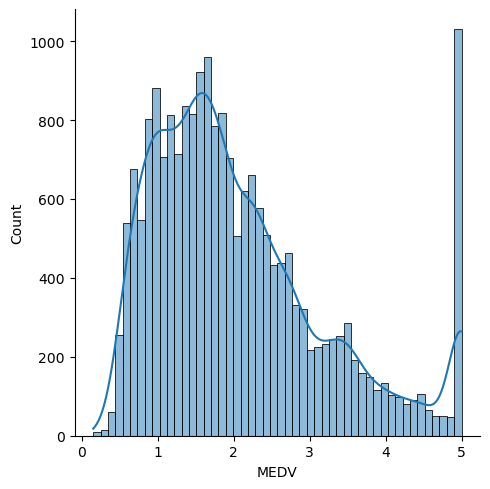

In [14]:
sns.displot(housing_df["MEDV"], bins=50,  kde=True)

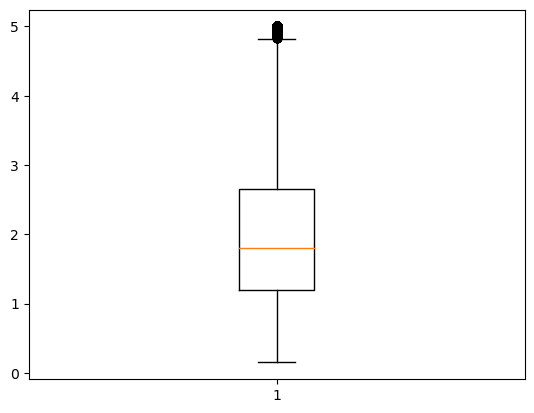

In [15]:
plt.boxplot(housing_df["MEDV"]);

## Imputing outliers with median

In [16]:
q1 = np.percentile(housing_df["MEDV"],25)
q3 = np.percentile(housing_df["MEDV"],75)
IQR= q3 - q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
housing_df["MEDV"]=np.where(housing_df["MEDV"]<lb,housing_df["MEDV"].median(),housing_df["MEDV"])
housing_df["MEDV"]=np.where(housing_df["MEDV"]>ub,housing_df["MEDV"].median(),housing_df["MEDV"])

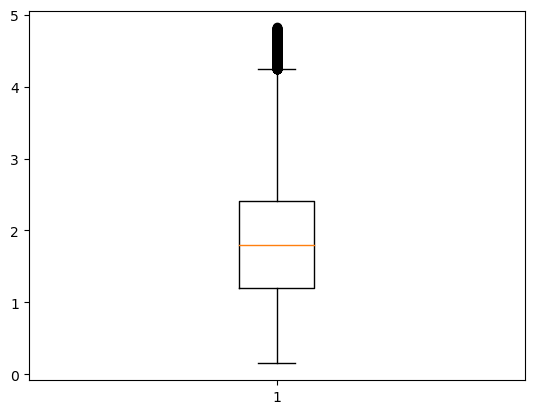

In [17]:
plt.boxplot(housing_df["MEDV"]);

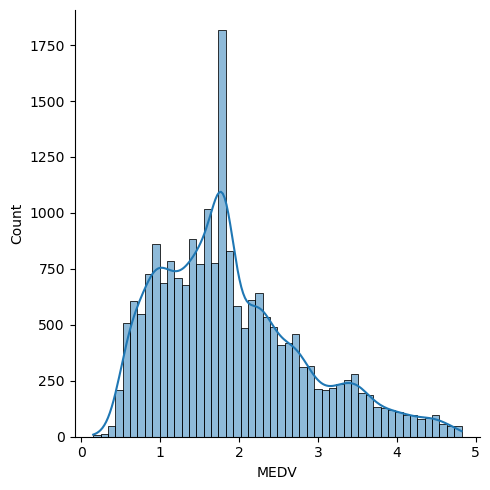

In [21]:
sns.displot(housing_df["MEDV"], bins=50,  kde=True)

## Correlation
* pearson correlation coefficient
* It is denoted by r
* r varies from -1 to 1
* -1 to 0 is negative correlation
* 0 to 1 is positive correlation
* 0 is no correlation independent to eachother
* COV(X,Y)/STD(X)*STD(Y)

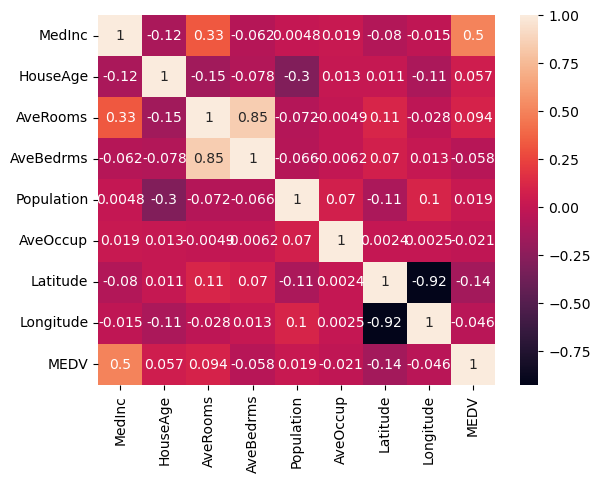

In [18]:
sns.heatmap(housing_df.corr(), annot=True);

In [25]:
pd.DataFrame(housing_df.corr().round(2)["MEDV"].drop("MEDV")).sort_values(by="MEDV")

,MEDV
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


In [26]:
pd.DataFrame(housing_df.corr().round(2)["MEDV"].\
             drop("MEDV")).\
            sort_values(by="MEDV")

,MEDV
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


## ML model
* Before starting any ML algorithm
* We need to seperate input and target data

In [27]:
housing_df.columns
# if you want to seperate the input data and output data
# either you can select all the input columns
# Or you can drop the target column

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

In [30]:
# Creating a input data
X = housing_df.drop("MEDV", axis=1)
# Creating an output  data
y = housing_df["MEDV"]

## Divide data into train data and test data
* train_test-split
* This method will take input data (X) and target data (y)
* This method also will take how much percentage we need to divide the data
* This method also takes random state: data divides randomly

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1234)

In [36]:
print(housing_df.shape)
20640*20/100

# 4128  are test observations
# 16512 are train observations
# 20640 - 4128
# Total columns are 9 = input(8) + target(1)

(20640, 9)


4128.0

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Apply ML model
* Import package: Model name
* Read the package
* 

In [39]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [40]:
linear_model.coef_

array([ 1.95411404e-01,  1.21921388e-03,  9.71952147e-03,  7.31311066e-02,
        1.40334856e-05, -2.32616269e-03, -4.54795976e-01, -4.66427226e-01])

In [41]:
linear_model.intercept_

-38.59990671278713

## Predictions
* Model development happens with X_train,y_train
* Predictions will only happen with X_test
* The output is called y_predictions
* Finally we compare y_predictions with y_test
* So that we can get the model performance

In [44]:
y_test_predictions = linear_model.predict(X_test)
y_test_predictions

array([2.23606134, 2.30816604, 2.26297435, ..., 0.92288657, 2.15161111,
       1.44124852])

In [45]:
y_test.values[:5]

array([1.797, 2.939, 4.125, 1.576, 3.041])

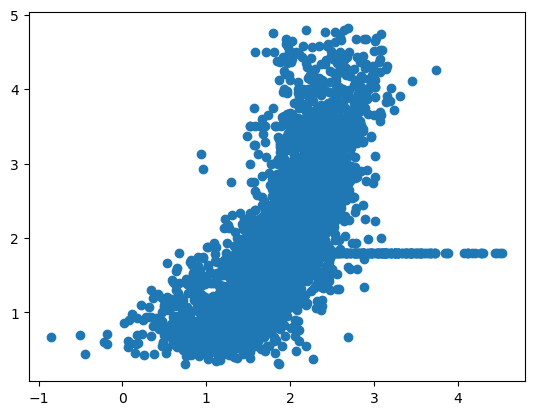

In [46]:
plt.scatter(y_test_predictions,y_test.values);

## Get the P-value analysis
* H0 there is no relationship between independant and target variable

* H1 there is relation

In [48]:
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          1.323e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):                        0.00
Time:                        10:11:36   Log-Likelihood:                         -19280.
No. Observations:               16512   AIC:                                  3.858e+04
Df Residuals:                   16504   BIC:                                  3.864e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.2794      0.005     58.168      0.000       0.270       0.289
HouseAge       0.0076      0.001     14.691      0.000       0.007       0.009
AveRooms      -0.0772      0.007    -10.997      0.000      -0.091      -0.063
AveBedrms      0.3161      0.033      9.629      0.000       0.252       0.380
Population  2.611e-05   5.74e-06      4.550      0.000    1.49e-05    3.74e-05
AveOccup      -0.0029      0.001     -5.086      0.000      -0.004      -0.002
Latitude      -0.0806      0.004    -20.052      0.000      -0.088      -0.073
Longitude     -0.0294      0.001    -23.111      0.000      -0.032      -0.027
==============================================================================
Omnibus:                     1253.616   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.991
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       4.467   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
linear_model.coef_

array([ 1.95411404e-01,  1.21921388e-03,  9.71952147e-03,  7.31311066e-02,
        1.40334856e-05, -2.32616269e-03, -4.54795976e-01, -4.66427226e-01])

## Metrics
* Mean squared error
* RMSE
* R-square

In [51]:
mse = mean_squared_error(y_test,y_test_predictions)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_test_predictions)
print("MSE: ",mse)
print("RMSE: ", rmse)
print("R squared: ", r_square)

MSE:  0.5102664009872732
RMSE:  0.71432933650192
R squared:  0.40815167772165906


## Pickle the model
* Save the model

In [53]:
import pickle
pickle.dump(linear_model,open("model.pkl","wb"))

## load the model

In [54]:
model = pickle.load(open("model.pkl","rb"))

In [55]:
# input data has 8 columns
# one sample: [1,2,3,4,5,6,7,8]
model.predict([[1,2,3,4,5,6,7,8]])

C:\Users\mdsho\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-45.00925033])